In [2]:
import os 
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import processing
import importlib


Plotting all the monthly and weekly time series.

In [2]:
regionvec=['Rotterdam','Den Haag', 'Amsterdam', 'Assen', 'Utrecht', 'Eindhoven', 'Beverwijk', 'Zwolle']
vestig_vec=[6,9,8,4,7,1,5,3]
# vestig_vec=[7]
# vestig_vec=[6,9,8,4,7,5,1]

vestig_region={'3':'Rotterdam','6':'Den Haag','9':'Amsterdam','8': 'Assen','4':'Utrecht','7': 'Eindhoven','1': 'Beverwijk', '5':'Zwolle'}


In [ ]:
importlib.reload(processing)
for vestiging_code in vestig_vec[:]:
    # vestiging_code=3
    region=vestig_region[str(vestiging_code)]
    # artikel_code_vec=['AHEK']
    # artikel_code_vec=['PB6090']
    start_year=2010
    # artikel_code_vec=['AHEK','J16-90','PB6090','TB80120G','A01-80-(30)']
    artikel_code_vec=['C02-80']    
    for artikel_code in artikel_code_vec:
        # artikel_code= 'TB80120G'
        # region='Rotterdam'
        # region='Den Haag'|
        file_loc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Modelling\processed_data'
        file_loc=file_loc+ "/" + region
        day_file=os.path.join(file_loc,artikel_code+'_day'+str(start_year)+'.csv')
        df_day=pd.read_csv(day_file,header=0,sep=',',on_bad_lines='warn')
        print(df_day.keys())
        day_ts=df_day['Net_daily_art']
        year_month_ts=df_day['Date']
        results_fileloc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Results'+"/"+region
        filename=os.path.join(results_fileloc,artikel_code+'_day'+str(start_year)+'_new.jpg')
        typ='day'
        processing.plot_ts_daily(year_month_ts,day_ts,artikel_code,region,filename,typ)
    

In [ ]:
importlib.reload(processing)
for vestiging_code in vestig_vec[:]:
    # vestiging_code=3
    region=vestig_region[str(vestiging_code)]
    # artikel_code_vec=['AHEK']
    # artikel_code_vec=['PB6090']
    start_year=2010
    artikel_code_vec=['AHEK','J16-90','PB6090','TB80120G','A01-80-(30)']
        
    for artikel_code in artikel_code_vec:
        # artikel_code= 'TB80120G'
        # region='Rotterdam'
        # region='Den Haag'|
        file_loc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Modelling\processed_data'
        file_loc=file_loc+ "/" + region
        month_file=os.path.join(file_loc,artikel_code+'_month'+str(start_year)+'.csv')
        week_file=os.path.join(file_loc,artikel_code+'_week'+str(start_year)+'.csv')
        df_month=pd.read_csv(month_file,header=0,sep=',',on_bad_lines='warn')
        print(df_month.keys())
        df_week=pd.read_csv(week_file,header=0,sep=',',on_bad_lines='warn')
        print(df_week.keys())
        month_ts=df_month['Net_month_art']
        year_month_ts=df_month['Date']
        week_ts=df_week['Net_week_art']
        year_week_ts=df_week['Date']
        results_fileloc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Results'+"/"+region
        filename=os.path.join(results_fileloc,artikel_code+'_month'+str(start_year)+'.jpg')
        typ='month'
        processing.plot_ts_monthly(year_month_ts,month_ts,artikel_code,region,filename,typ)
        filename=os.path.join(results_fileloc,artikel_code+'_week'+str(start_year)+'.jpg')
        typ='week'
        processing.plot_ts_weekly(year_week_ts,week_ts,artikel_code,region,filename,typ)

Change in two computations:
1. end date include in the last day.
2. add end date to bestel bons not included in retour bon of two weeks. 

In [13]:
# artikel_code_vec=['PB6090']
regionvec=['Rotterdam']
# vestig_vec=[3,6,9,8,4,7,1,5]
# vestig_vec=[6,9,8,4,7,5]
vestig_vec=[3]
vestiging_code=vestig_vec[0]
# num_cores = multiprocessing.cpu_count()

vestig_region={'3':'Rotterdam','6':'Den Haag','9':'Amsterdam','8': 'Assen','4':'Utrecht','7': 'Eindhoven','1': 'Beverwijk', '5':'Zwolle'}


start_year=2010
# def parallel_func(vestiging_code):
artikel_code='AHEK'
# artikel_code_vec=['AHEK','J16-90','PB6090','TB80120G','A01-80-(30)']
# artikel_code_vec=['TB80120G','A01-80-(30)']
# artikel_code_vec=['PB6090','TB80120G','A01-80-(30)']
region=vestig_region[str(vestiging_code)]   
start_year=2010
# for artikel_code in artikel_code_vec:
file_loc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Modelling\processed_data'
file_loc=file_loc+ "/" + region
in_file=os.path.join(file_loc,artikel_code+'_ing_'+str(start_year)+'.csv')
end_file=os.path.join(file_loc,artikel_code+'_end_'+str(start_year)+'.csv')
print(in_file)
df_in=pd.read_csv(in_file,header=0,sep=',',on_bad_lines='warn')
print(df_in.keys())
df_end=pd.read_csv(end_file,header=0,sep=',',on_bad_lines='warn')
print(df_end.keys())

in_date_vec=df_in['Ing_Datum']
in_aantal_vec=df_in['Ing_Aantal']
in_order_vec=np.array(df_in['Ing_Order']).astype(int)
issue_index=processing.get_issue_dates(in_date_vec)
# (in_nanindex,in_aantal_vec)=processing.make_nanindex_to_zero(in_aantal_vec)
# print(in_aantal_vec[in_nanindex])
end_date_vec=df_end['End_Datum']
end_aantal_vec=df_end['Ret_Aantal']
end_order_vec=np.array(df_end['End_Order']).astype(int)
# end_issue_index=processing.get_issue_dates(end_date_vec)
# (end_nanindex,end_aantal_vec)=processing.make_nanindex_to_zero(end_aantal_vec)
# print(end_aantal_vec[end_nanindex])

C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Modelling\processed_data/Rotterdam\AHEK_ing_2010.csv
Index(['Unnamed: 0', 'Ing_Order', 'Ing_Datum', 'Ing_Aantal'], dtype='object')
Index(['Unnamed: 0', 'End_Order', 'End_Datum', 'Ret_Aantal'], dtype='object')
nan
21194


In [2]:
import datetime
import pandas as pd
import numpy as np
start_year=2007
start_date="01-01-"+str(start_year)
year_weekly_time_series=pd.date_range(start=start_date,end="01-01-2022",freq='W')
year_week=year_weekly_time_series.isocalendar().week
if year_week[0]==0:
    year_weekly_time_series=year_weekly_time_series
else:
    year_weekly_time_series=year_weekly_time_series[1:]      
max_art_week_year_vec=[]
weekvec=np.arange(0,53)+1  

In [3]:
year_weekly_time_series

DatetimeIndex(['2007-01-14', '2007-01-21', '2007-01-28', '2007-02-04',
               '2007-02-11', '2007-02-18', '2007-02-25', '2007-03-04',
               '2007-03-11', '2007-03-18',
               ...
               '2021-10-24', '2021-10-31', '2021-11-07', '2021-11-14',
               '2021-11-21', '2021-11-28', '2021-12-05', '2021-12-12',
               '2021-12-19', '2021-12-26'],
              dtype='datetime64[ns]', length=781, freq='W-SUN')

In [258]:
importlib.reload(processing)


Verifying sum of value  counts:423
Length of add_date=423
Verifying sum of value  counts:65
Length of add_date=65
Missing order numbers still after addtion are: Series([], dtype: float64)


C:\Users\Amey.RISE3D\AppData\Local\Temp\ipykernel_19812\1952818492.py:78: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  intersect_test=pd.Series(list(set(in_order_all).symmetric_difference(set(end_order_all))))


In [13]:
# artikel_code_vec=['PB6090']
regionvec=['Rotterdam','Den Haag', 'Amsterdam', 'Assen', 'Utrecht', 'Eindhoven', 'Beverwijk', 'Zwolle']
# vestig_vec=[3,6,9,8,4,7,1,5]
# vestig_vec=[6,9,8,4,7,5]
vestig_vec=[1,3]
# num_cores = multiprocessing.cpu_count()
vestig_region={'3':'Rotterdam','6':'Den Haag','9':'Amsterdam','8': 'Assen','4':'Utrecht','7': 'Eindhoven','1': 'Beverwijk', '5':'Zwolle'}
vestiging_code=3

start_year=2010
# def parallel_func(vestiging_code):
artikel_code='AHEK'
    # artikel_code_vec=['AHEK','J16-90','PB6090','TB80120G','A01-80-(30)']
# artikel_code_vec=['C02-80']
artikel_code_vec=['AHEK']
    # artikel_code_vec=['PB6090','TB80120G','A01-80-(30)']
region=vestig_region[str(vestiging_code)]   
start_year=2007
# file_loc=
for artikel_code in artikel_code_vec:
    # file_loc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Modelling\processed_data'
    dirname=os.path.dirname(os.getcwd())
    file_loc=os.path.join(dirname,'processed_data')
    file_loc=file_loc+ "/" + region
    in_file=os.path.join(file_loc,artikel_code+'_ing_'+str(start_year)+'.csv')
    end_file=os.path.join(file_loc,artikel_code+'_end_'+str(start_year)+'.csv')
    print(in_file)
    df_in=pd.read_csv(in_file,header=0,sep=',',on_bad_lines='warn')
    print(df_in.keys())
    df_end=pd.read_csv(end_file,header=0,sep=',',on_bad_lines='warn')
    print(df_end.keys())
    #requires in put df_in and df_end
    in_date=df_in['Ing_Datum']
    in_aantal=df_in['Ing_Aantal']
    in_order=df_in['Ing_Order']
    #issue index is where date is a nan. we remove those indices.
    in_date,in_aantal,in_order=processing.rem_issue_dates(in_date,in_aantal,in_order)
    #change nan in aantal to zero
    (in_nanindex,in_aantal)=processing.make_nanindex_to_zero(in_aantal)
    ##end
    end_date=df_end['End_Datum']
    end_aantal=df_end['Ret_Aantal']
    end_order=df_end['End_Order']
    end_date,end_aantal,end_order=processing.rem_issue_dates(end_date,end_aantal,end_order)
    #change nan in aantal to zero
    (end_nanindex,end_aantal)=processing.make_nanindex_to_zero(end_aantal)

        # doing two things
        # 1. adding 1 extra day to end date
        # 2 finding orders missing in bestel and retour bns and adding 14 daysto them
    # (in_order,in_aantal,in_date,end_order,end_aantal,end_date)=processing.getting_merged_series(in_order,in_aantal,in_date,end_order,end_aantal,end_date)
    

/home/amey/Projects/BUKO_Forecasting/Modelling/processed_data/Rotterdam/AHEK_ing_2007.csv
Index(['Unnamed: 0', 'Ing_Order', 'Ing_Datum', 'Ing_Aantal'], dtype='object')
Index(['Unnamed: 0', 'End_Order', 'End_Datum', 'Ret_Aantal'], dtype='object')


In [14]:
intersect=pd.Series(list(set(in_order).intersection(set(end_order))))
intersect_in=pd.Series(list(set(in_order).symmetric_difference(set(intersect))))
intersect_end=pd.Series(list(set(end_order).symmetric_difference(set(intersect))))

In [8]:
a=np.where(intersect_in==intersect_end.va)[0]
intersect_in[a]

AttributeError: 'Series' object has no attribute 'va'

In [18]:
a=np.where(df_end['End_Order']==373967.0)

In [19]:
a

(array([], dtype=int64),)

In [6]:
intersect_in

0      458814.0
1      458815.0
2      524395.0
3      524674.0
4      524932.0
         ...   
111    326683.0
112    523870.0
113    327520.0
114    524176.0
115    524263.0
Length: 116, dtype: float64

In [94]:
ind_intersect_in=in_order[in_order==intersect_in]

ValueError: Can only compare identically-labeled Series objects

In [38]:
inter2=pd.merge(in_order_vec,end_order_vec,how='inner',left_on=['Ing_Order'],right_on=['End_Order'])

In [37]:
inter2=inter2.drop_duplicates()

In [42]:
in_order_counts=in_order_vec.value_counts(sort=False)

In [43]:
in_order_non_dup=in_order_vec.drop_duplicates()
end_order_non_dup=end_order_vec.drop_duplicates()

In [49]:
intersect=pd.Series(list(set(in_order_non_dup).intersection(set(end_order_non_dup))))

In [57]:
intersect_in=pd.Series(list(set(in_order_non_dup).symmetric_difference(set(intersect))))
intersect_end=pd.Series(list(set(end_order_non_dup).symmetric_difference(set(intersect))))

In [6]:
artikel_code='AHEK'
# artikel_code= 'TB80120G'
region='Rotterdam'
# region='Den Haag'
file_loc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Modelling\processed_data'
file_loc=file_loc+ "/" + region
month_file=os.path.join(file_loc,artikel_code+'_month.csv')
week_file=os.path.join(file_loc,artikel_code+'_week.csv')
df_month=pd.read_csv(month_file,header=0,sep=',',on_bad_lines='warn')
print(df_month.keys())
df_week=pd.read_csv(week_file,header=0,sep=',',on_bad_lines='warn')
print(df_week.keys())
month_ts=df_month['Net_month_art']
year_month_ts=df_month['Date']
week_ts=df_week['Net_week_art']
year_week_ts=df_week['Date']


Index(['Unnamed: 0', 'Date', 'Net_month_art'], dtype='object')
Index(['Unnamed: 0', 'Date', 'Net_week_art'], dtype='object')


[]

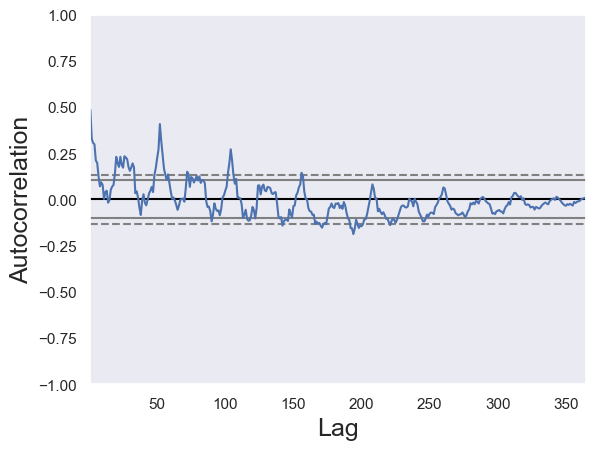

In [28]:
week_series=pd.Series(week_ts)
x=pd.plotting.autocorrelation_plot(week_series)
x.plot()

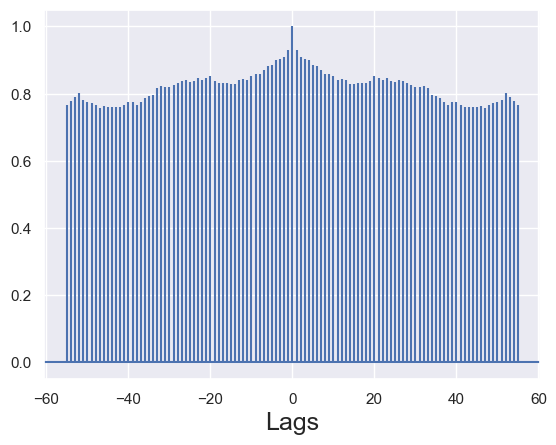

In [35]:
plt.xlabel('Lags')
obj=plt.acorr(week_series,maxlags=55)


In [38]:
obj[0]

array([-55, -54, -53, -52, -51, -50, -49, -48, -47, -46, -45, -44, -43,
       -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30,
       -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17,
       -16, -15, -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,
        -3,  -2,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
        10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,
        23,  24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,
        36,  37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,
        49,  50,  51,  52,  53,  54,  55])

In [51]:
start_year=2010
start_date="01-01-"+str(start_year)
year_weekly_time_series=pd.date_range(start=start_date,end="01-01-2022",freq='W')

In [52]:
weekvec=year_weekly_time_series.isocalendar().week

In [54]:
print(weekvec[1])

1


In [31]:
file_loc=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_Forecasting\Modelling\processed_data'

df=pd.read_csv(file_loc+'/Den Haag/AHEK_day2010.csv',header=0,sep=',',on_bad_lines='warn')
df.head()

,Unnamed: 0,Date,Net_daily_art
0,0,2010-01-01,0.0
1,1,2010-01-02,0.0
2,2,2010-01-03,0.0
3,3,2010-01-04,0.0
4,4,2010-01-05,0.0


In [32]:
test_val=[]
for i in range(len(df.Net_daily_art)):
    ival=np.sum(df.Net_daily_art[:i+1])
    test_val=np.append(test_val,ival)

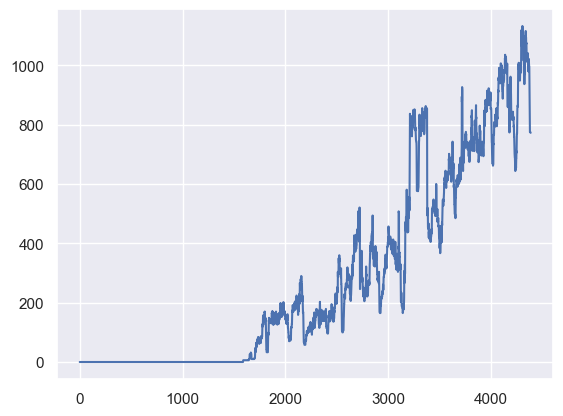

In [34]:
# plt.plot(test_val)
plt.plot(df.Net_daily_art)

Changin TIM's all locations output to suit my input

In [31]:
all_loc_file='../processed_data/All Locations/'
file=all_loc_file+'data_TB80120G_total.csv'
df=pd.read_csv(file)
df.head()

,Datum,Aantal in verhuur
0,2007-01-01 00:00:00,48
1,2007-01-02 00:00:00,48
2,2007-01-03 00:00:00,48
3,2007-01-04 00:00:00,48
4,2007-01-05 00:00:00,48


In [32]:
Datevec=pd.to_datetime(df.Datum).dt.date
print(Datevec)
Net_Art=df['Aantal in verhuur']
print(Net_Art)


0       2007-01-01
1       2007-01-02
2       2007-01-03
3       2007-01-04
4       2007-01-05
           ...    
5850    2023-07-04
5851    2023-09-27
5852    2023-09-28
5853    2023-09-29
5854    2023-09-30
Name: Datum, Length: 5855, dtype: object
0       48
1       48
2       48
3       48
4       48
        ..
5850    16
5851    10
5852    10
5853    10
5854    10
Name: Aantal in verhuur, Length: 5855, dtype: int64


In [33]:
month_dict={'Date':Datevec,'Net_daily_art':Net_Art}
artikel_code_vec=['TB80120G']
artikel_code=artikel_code_vec[0]
start_year=2007
df_month=pd.DataFrame.from_dict(month_dict)
file=os.path.join(all_loc_file,artikel_code+'_day'+str(start_year)+'.csv')
df_month.to_csv(file)

In [34]:
#!/bin/sh

import os 
import sys
import numpy as np
import pandas as pd
import processing
import importlib
from matplotlib import dates as mdates
import matplotlib
import pandas as pd
import multiprocessing
from joblib import Parallel, delayed
from tqdm import tqdm

#reading ingang and eind data
# artikel_code='AHEK'
# artikel_code= 'TB80120G'
region='All Locations'
# # region='Amsterdam'
# # 
# artikel_code_vec=['PB6090']
# regionvec=['Rotterdam','Den Haag', 'Amsterdam', 'Assen', 'Utrecht', 'Eindhoven', 'Beverwijk', 'Zwolle']
# vestig_vec=[3,6,9,8,4,7,1,5]
vestig_vec=[3,6,9,8,4,7,5,1]
# num_cores = multiprocessing.cpu_count()


start_year=2007
end_year=2023
# artikel_code='AHEK'

# artikel_code_vec=['PB6090','TB80120G','A01-80-(30)']
# region=vestig_region[str(vestiging_code)]   
start_year=2007
for artikel_code in artikel_code_vec:
    dirname=os.path.dirname(os.getcwd())
    file_loc=os.path.join(dirname,'processed_data',region)
    day_file=os.path.join(file_loc,artikel_code+'_day'+str(start_year)+'.csv')
    df_day=pd.read_csv(day_file,header=0,sep=',',on_bad_lines='warn')
    print(df_day.keys())
    day_ts=df_day['Net_daily_art']
    year_day_ts=df_day['Date']
    # proc_data_path=r'C:\Users\Amey.RISE3D\OneDrive - RISE3D\Documents\BUKO_forecasting\Modelling\processed_data'
    (year_time_series,net_art_month_year_vec)=processing.get_month_ts(day_ts,year_day_ts,start_year)
    month_dict={'Date':year_time_series,'Net_month_art':net_art_month_year_vec}
    df_month=pd.DataFrame.from_dict(month_dict)
    file=os.path.join(file_loc,artikel_code+'_month'+str(start_year)+'.csv')
    df_month.to_csv(file)


    (year_week_time_series,net_art_week_year_vec)=processing.get_week_ts_updated(day_ts,year_day_ts,start_year,end_year)
    # print('length: '+str(len(year_week_time_series)))
    # print('length: '+str(len(net_art_week_year_vec)))
    week_dict={'Date':year_week_time_series,'Net_week_art':net_art_week_year_vec[:-1]}
    df_week=pd.DataFrame.from_dict(week_dict)
    file=os.path.join(file_loc,artikel_code+'_week'+str(start_year)+'.csv')
    df_week.to_csv(file)
        


Index(['Unnamed: 0', 'Date', 'Net_daily_art'], dtype='object')
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2007
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2008
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2009
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
2010
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2011
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
2012
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
3